analysis borrowed from here https://www.kaggle.com/sasha18/resampling-methods-using-bootstrap-cv

In [8]:
import pandas as pd
import numpy as np

In [49]:
data = np.random.normal(0, 1, 1000000)

In [55]:
sample_means = []
for i in range(10000):
    sample = np.random.choice(data, size=100)
    sample_means.append(sample.mean())

In [56]:
np.mean(sample_means)

0.000973265991842303

In [57]:
import seaborn as sns

<AxesSubplot:ylabel='Probability'>

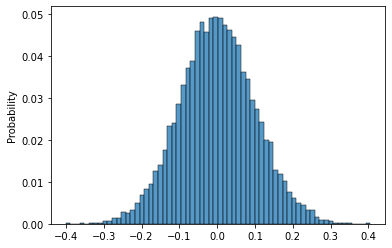

In [58]:
sns.histplot(sample_means, stat='probability')

In [43]:
diabetes = pd.read_csv('diabetes.csv')

In [44]:
X = diabetes.iloc[:, diabetes.columns != 'Outcome'].values
Y = diabetes['Outcome'].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [45]:
#Lets configure Bootstrap

n_iterations = 1000  #No. of bootstrap samples to be repeated (created)
n_size = int(len(X) * 0.50) #Size of sample, picking only 50% of the given data in every bootstrap sample

In [46]:
from sklearn.utils import resample # for Bootstrap sampling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [47]:
#Lets run Bootstrap
scores = []
candidate_indices = np.arange(len(X))
for i in range(n_iterations):
    train_indices = np.random.choice(candidate_indices, size=n_size)
    test_indices = np.setdiff1d(candidate_indices, train_indices)
    
    #prepare train & test sets
    X_train = X[train_indices]
    Y_train = Y[train_indices]
    
    X_test = X[test_indices]
    Y_test = Y[test_indices]
    
    #fit model
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train) #model.fit(X_train,y_train) i.e model.fit(train set, train label as it is a classifier)
    
    #evaluate model
    score = model.score(X_test, Y_test) #accuracy score on testing data
    
    scores.append(score)

<AxesSubplot:ylabel='Probability'>

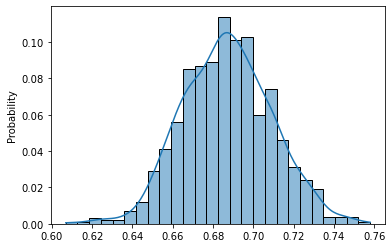

In [48]:
import seaborn as sns
sns.histplot(scores, stat='probability', kde=True)

In [15]:
print("95% confidence interval", np.percentile(scores, 2.5), np.percentile(scores, 97.5))

95% confidence interval 0.6440337549718708 0.7300342162100716


In [21]:
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold, cross_val_score

In [22]:
model = DecisionTreeClassifier()
kfold = KFold(n_splits = 10)
results = cross_val_score(model, X, Y, cv = kfold)

<AxesSubplot:ylabel='Probability'>

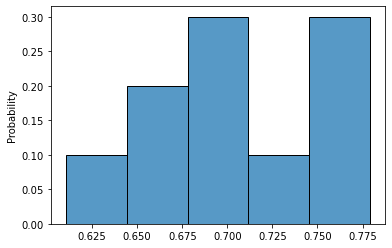

In [23]:
sns.histplot(results, stat='probability')

In [24]:
results.mean()

0.7043574846206425

In [19]:
loocv = LeaveOneOut()
results = cross_val_score(model, X, Y, cv = loocv)

In [20]:
results.mean()

0.6979166666666666

In [28]:
stratkfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=stratkfold)

<AxesSubplot:ylabel='Count'>

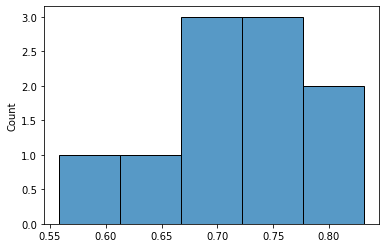

In [29]:
sns.histplot(results)

In [30]:
results.mean()

0.7095522898154477